# Auto-Correct Systems

In [1]:
import os
import re
import numpy as np 
import pandas as pd 
from collections import Counter
import nltk

#### Step1: read file

In [2]:
with open('Machine_learning_corpus.txt', 'r', encoding='ISO-8859-1') as f:
    file = f.readlines()

In [3]:
def read_file(lines):
    """
    Input: 
        A file_name which is found in your current directory. You just have to read it in. 
    Output: 
        words: a list containing all the words in the corpus (text file you read) in lower case. 
    """
    words = []        
    for line in lines:
        line = line.strip().lower()
        word = re.findall(r'\w+', line)
        words.extend(word)
    
    return words

In [4]:
word_list = read_file(file)
vocab = set(word_list)
print(f"The first ten words in the text are: \n{word_list[0:10]}")
print(f"There are {len(vocab)} unique words in the vocabulary.")

The first ten words in the text are: 
['study', 'of', 'algorithms', 'that', 'improve', 'automatically', 'through', 'experience', 'for', 'the']
There are 4108 unique words in the vocabulary.


#### Step2: Filter Misspelled Words


In [5]:
def find_wrong_word(sent, vocab):
    wrong_words = []
    sent = sent.strip().lower().split(" ")
    for word in sent:
        if word not in vocab:
            wrong_words.append(word)
    return wrong_words

In [6]:
find_wrong_word('he is goinng home', vocab)

['goinng']

#### Step3: Word Suggestion Mechanism
We'll impliment separate functions of each of the steps (deletion, insertion, switching, replace) and then combine them to edit one or two letter of the original word.

In [7]:
def delete_letter(word, verbose=False):
    '''
    Input:
        word: the string/word for which you will generate all possible words 
                in the vocabulary which have 1 missing character
    Output:
        delete_l: a list of all possible strings obtained by deleting 1 character from word
    '''
    
    delete_l = []
    split_l = []
    split_l = [(word[:i], word[i:]) for i in range(len(word))]
    delete_l = [s[0]+s[1][1:] for s in split_l]
    if verbose: print(f"input word : {word} \nsplit_l = {split_l}, \ndelete_l = {delete_l}")

    return delete_l

In [8]:
delete_word_l = delete_letter(word="cans",
                        verbose=True)

input word : cans 
split_l = [('', 'cans'), ('c', 'ans'), ('ca', 'ns'), ('can', 's')], 
delete_l = ['ans', 'cns', 'cas', 'can']


In [9]:
def switch_letter(word, verbose=False):
    '''
    Input:
        word: input string
     Output:
        switches: a list of all possible strings with one adjacent charater switched
    ''' 
    
    switch_l = []
    split_l = []
    split_l = [(word[:i], word[i:]) for i in range(len(word))]
    for s in split_l:
        if len(s[1])>2:
            temp = s[0] + s[1][1] + s[1][0] + s[1][2:]
        elif len(s[1]) == 2:
            temp = s[0] + s[1][1] + s[1][0]
        elif len(s[1]) == 1:
            continue
        switch_l.append(temp)
    
    if verbose: print(f"Input word = {word} \nsplit_l = {split_l} \nswitch_l = {switch_l}") 

    return switch_l

In [10]:
switch_word_l = switch_letter(word="eta",
                         verbose=True)

Input word = eta 
split_l = [('', 'eta'), ('e', 'ta'), ('et', 'a')] 
switch_l = ['tea', 'eat']


In [11]:
def replace_letter(word, verbose=False):
    '''
    Input:
        word: the input string/word 
    Output:
        replaces: a list of all possible strings where we replaced one letter from the original word. 
    ''' 
    
    letters = 'abcdefghijklmnopqrstuvwxyz'
    replace_l = []
    split_l = []
    split_l = [(word[:i], word[i:]) for i in range(len(word))]
    for s in split_l:
        if len(s[1]) == 1:
            for l in letters:
                if l != s[1][0]:
                    temp = l
                    replace_l.append(s[0]+temp)
        elif len(s) > 1:
            for l in letters:
                if l != s[1][0]:
                    temp = l + s[1][1:]
                    replace_l.append(s[0]+temp)
        
    replace_set = set(replace_l)
    
    # turn the set back into a list and sort it, for easier viewing
    replace_l = sorted(list(replace_set))
    
    if verbose: print(f"Input word = {word} \nsplit_l = {split_l} \nreplace_l {replace_l}")   
    
    return replace_l

In [12]:
replace_l = replace_letter(word='can',
                              verbose=True)

Input word = can 
split_l = [('', 'can'), ('c', 'an'), ('ca', 'n')] 
replace_l ['aan', 'ban', 'caa', 'cab', 'cac', 'cad', 'cae', 'caf', 'cag', 'cah', 'cai', 'caj', 'cak', 'cal', 'cam', 'cao', 'cap', 'caq', 'car', 'cas', 'cat', 'cau', 'cav', 'caw', 'cax', 'cay', 'caz', 'cbn', 'ccn', 'cdn', 'cen', 'cfn', 'cgn', 'chn', 'cin', 'cjn', 'ckn', 'cln', 'cmn', 'cnn', 'con', 'cpn', 'cqn', 'crn', 'csn', 'ctn', 'cun', 'cvn', 'cwn', 'cxn', 'cyn', 'czn', 'dan', 'ean', 'fan', 'gan', 'han', 'ian', 'jan', 'kan', 'lan', 'man', 'nan', 'oan', 'pan', 'qan', 'ran', 'san', 'tan', 'uan', 'van', 'wan', 'xan', 'yan', 'zan']


In [13]:
print(f"Number of outputs of switch_letter('at') is {len(switch_letter('fate'))}")

Number of outputs of switch_letter('at') is 3


In [14]:
def insert_letter(word, verbose=False):
    '''
    Input:
        word: the input string/word 
    Output:
        inserts: a set of all possible strings with one new letter inserted at every offset
    ''' 
    letters = 'abcdefghijklmnopqrstuvwxyz'
    insert_l = []
    split_l = []
    split_l = [(word[:i], word[i:]) for i in range(len(word)+1)]
    for s in split_l:
        for l in letters:
            insert_l.append(s[0]+l+s[1])

    if verbose: print(f"Input word {word} \nsplit_l = {split_l} \ninsert_l = {insert_l}")
    
    return insert_l

In [15]:
insert_l = insert_letter('at', True)
print(f"Number of strings output by insert_letter('at') is {len(insert_l)}")

Input word at 
split_l = [('', 'at'), ('a', 't'), ('at', '')] 
insert_l = ['aat', 'bat', 'cat', 'dat', 'eat', 'fat', 'gat', 'hat', 'iat', 'jat', 'kat', 'lat', 'mat', 'nat', 'oat', 'pat', 'qat', 'rat', 'sat', 'tat', 'uat', 'vat', 'wat', 'xat', 'yat', 'zat', 'aat', 'abt', 'act', 'adt', 'aet', 'aft', 'agt', 'aht', 'ait', 'ajt', 'akt', 'alt', 'amt', 'ant', 'aot', 'apt', 'aqt', 'art', 'ast', 'att', 'aut', 'avt', 'awt', 'axt', 'ayt', 'azt', 'ata', 'atb', 'atc', 'atd', 'ate', 'atf', 'atg', 'ath', 'ati', 'atj', 'atk', 'atl', 'atm', 'atn', 'ato', 'atp', 'atq', 'atr', 'ats', 'att', 'atu', 'atv', 'atw', 'atx', 'aty', 'atz']
Number of strings output by insert_letter('at') is 78


#### Let's combine these individual steps and impliment two function for for editing on or two characters from a word.

In [16]:
def edit_one_letter(word, allow_switches = True):
    """
    Input:
        word: the string/word for which we will generate all possible wordsthat are one edit away.
    Output:
        edit_one_set: a set of words with one possible edit. Please return a set. and not a list.
    """
    
    edit_one_set = set()
    insert_l = insert_letter(word)
    delete_l = delete_letter(word)
    replace_l = replace_letter(word)
    switch_l = switch_letter(word)
    
    if allow_switches:
        ans = insert_l + delete_l + replace_l + switch_l
    else:
        ans = insert_l + delete_l + replace_l
        
    edit_one_set = set(ans)

    return edit_one_set

In [17]:
tmp_word = "at"
tmp_edit_one_set = edit_one_letter(tmp_word)
# turn this into a list to sort it, in order to view it
tmp_edit_one_l = sorted(list(tmp_edit_one_set))

print(f"input word : {tmp_word} \nedit_one_l \n{tmp_edit_one_l}\n")
#print(f"The type of the returned object should be a set {type(tmp_edit_one_set)}")
print(f"Number of outputs from edit_one_letter('at') is {len(edit_one_letter('at'))}")

input word : at 
edit_one_l 
['a', 'aa', 'aat', 'ab', 'abt', 'ac', 'act', 'ad', 'adt', 'ae', 'aet', 'af', 'aft', 'ag', 'agt', 'ah', 'aht', 'ai', 'ait', 'aj', 'ajt', 'ak', 'akt', 'al', 'alt', 'am', 'amt', 'an', 'ant', 'ao', 'aot', 'ap', 'apt', 'aq', 'aqt', 'ar', 'art', 'as', 'ast', 'ata', 'atb', 'atc', 'atd', 'ate', 'atf', 'atg', 'ath', 'ati', 'atj', 'atk', 'atl', 'atm', 'atn', 'ato', 'atp', 'atq', 'atr', 'ats', 'att', 'atu', 'atv', 'atw', 'atx', 'aty', 'atz', 'au', 'aut', 'av', 'avt', 'aw', 'awt', 'ax', 'axt', 'ay', 'ayt', 'az', 'azt', 'bat', 'bt', 'cat', 'ct', 'dat', 'dt', 'eat', 'et', 'fat', 'ft', 'gat', 'gt', 'hat', 'ht', 'iat', 'it', 'jat', 'jt', 'kat', 'kt', 'lat', 'lt', 'mat', 'mt', 'nat', 'nt', 'oat', 'ot', 'pat', 'pt', 'qat', 'qt', 'rat', 'rt', 'sat', 'st', 't', 'ta', 'tat', 'tt', 'uat', 'ut', 'vat', 'vt', 'wat', 'wt', 'xat', 'xt', 'yat', 'yt', 'zat', 'zt']

Number of outputs from edit_one_letter('at') is 129


In [18]:
def edit_two_letters(word, allow_switches = True):
    '''
    Input:
        word: the input string/word 
    Output:
        edit_two_set: a set of strings with all possible two edits
    '''
    
    edit_two_set = set()
    one_edit = edit_one_letter(word)
    ans = []
    for w in one_edit:
        ans.append(w)
        ans.extend(edit_one_letter(w))
        
    edit_two_set = set(ans)
    
    return edit_two_set

In [19]:
tmp_edit_two_set = edit_two_letters("a")
tmp_edit_two_l = sorted(list(tmp_edit_two_set))
print(f"Number of strings with edit distance of two: {len(tmp_edit_two_l)}")
print(f"First 10 strings {tmp_edit_two_l[:10]}")
print(f"Last 10 strings {tmp_edit_two_l[-10:]}")
print(f"The data type of the returned object should be a set {type(tmp_edit_two_set)}")
print(f"Number of strings that are 2 edit distances from 'at' is {len(edit_two_letters('at'))}")

Number of strings with edit distance of two: 2654
First 10 strings ['', 'a', 'aa', 'aaa', 'aab', 'aac', 'aad', 'aae', 'aaf', 'aag']
Last 10 strings ['zv', 'zva', 'zw', 'zwa', 'zx', 'zxa', 'zy', 'zya', 'zz', 'zza']
The data type of the returned object should be a set <class 'set'>
Number of strings that are 2 edit distances from 'at' is 7154


In [20]:
def get_count(word_list):
    '''
    Input:
        word_l: a set of words representing the corpus. 
    Output:
        word_count_dict: The wordcount dictionary where key is the word and value is its frequency.
    '''
    word_count_dict = {}  
    word_count_dict = Counter(word_list)
    return word_count_dict

In [21]:
word_count_dict = get_count(word_list)
print(f"There are {len(word_count_dict)} key values pairs")
print(f"The count for the word 'the' is {word_count_dict.get('the',0)}")

There are 4108 key values pairs
The count for the word 'the' is 569


In [22]:
def get_probs(word_count_dict):
    '''
    Input:
        word_count_dict: The wordcount dictionary where key is the word and value is its frequency.
    Output:
        probs: A dictionary where keys are the words and the values are the probability that a word will occur. 
    '''
    probs = {} 
    total = 1
    for word in word_count_dict.keys():
        total = total + word_count_dict[word]
        
    for word in word_count_dict.keys():
        probs[word] = word_count_dict[word]/total
    return probs

In [23]:
probs = get_probs(word_count_dict)
print(f"Length of probs is {len(probs)}")
print(f"P('learning') is {probs['learning']:.4f}")

Length of probs is 4108
P('learning') is 0.0268


In [24]:
prob_df = pd.DataFrame({'word':probs.keys(), 'probability':probs.values()}).sort_values(by='probability', ascending=False)
prob_df.head()

,word,probability
9,the,0.035282
13,learning,0.026849
1,of,0.022571
26,a,0.020463
12,machine,0.018292


<Axes: xlabel='word'>

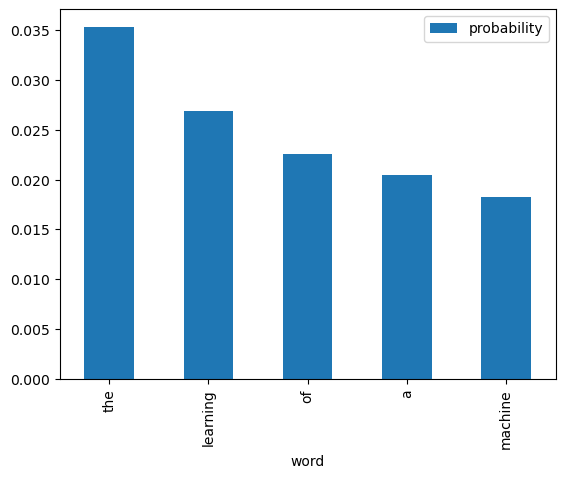

In [25]:
prob_df.head().plot.bar(x='word', y='probability')

#### Step4: Implete N-Grams 

In [60]:
def count_n_grams(data, n, start_token='<s>', end_token = '<e>'):
    
    # Initialize dictionary of n-grams and their counts
    n_grams = {}

    
    for sentence in data: 
        
        # prepend start token n times, and  append <e> one time
        sentence = [start_token]*n + sentence + [end_token]
        sentence = tuple(sentence)
        
        for i in range(len(sentence)-n): 
            n_gram = sentence[i:i+n]
            if n_gram in n_grams.keys():
                n_grams[n_gram] += 1
            else:
                n_grams[n_gram] = 1
    return n_grams

In [61]:
### SOME UTILITY

def split_to_sentences(data):
    #sentences = data.split("\n")
    sentences = [s.strip() for s in data]
    sentences = [s for s in sentences if len(s) > 0]
    return sentences    

def tokenize_sentences(sentences):
    tokenized_sentences = []
    for sentence in sentences:
        sentence = sentence.lower()
        tokenized = nltk.tokenize.word_tokenize(sentence)
        tokenized_sentences.append(tokenized)
    return tokenized_sentences


def get_tokenized_data(data):
    sentences = split_to_sentences(data)
    tokenized_sentences = tokenize_sentences(sentences)
    return tokenized_sentences

In [62]:
tokenized_data = get_tokenized_data(file)
bigram_counts = count_n_grams(tokenized_data, 2)

In [63]:
print(bigram_counts)

{('<s>', '<s>'): 1018, ('<s>', 'study'): 1, ('study', 'of'): 4, ('of', 'algorithms'): 3, ('algorithms', 'that'): 5, ('that', 'improve'): 1, ('improve', 'automatically'): 1, ('automatically', 'through'): 1, ('through', 'experience'): 1, ('<s>', 'for'): 2, ('for', 'the'): 8, ('the', 'journal'): 1, ('journal', ','): 1, (',', 'see'): 2, ('see', 'machine'): 1, ('machine', 'learning'): 246, ('learning', '('): 10, ('(', 'journal'): 1, ('journal', ')'): 1, (')', '.'): 153, ('<s>', '``'): 1, ('``', 'statistical'): 1, ('statistical', 'learning'): 9, ('learning', "''"): 16, ("''", 'redirects'): 1, ('redirects', 'here'): 1, ('here', '.'): 1, ('.', 'for'): 9, ('for', 'statistical'): 1, ('learning', 'in'): 12, ('in', 'linguistics'): 1, ('linguistics', ','): 1, ('see', 'statistical'): 1, ('in', 'language'): 3, ('language', 'acquisition.my'): 1, ('acquisition.my', 'best'): 1, ('best', 'algorithm'): 57, ('algorithm', 'is'): 59, ('is', 'machine'): 59, ('learning', '.'): 80, ('<s>', 'part'): 2, ('part', 

In [30]:
def get_bigram_prob(word, prev_word, bigram_counts, factor, threshold=5):
    key = tuple([prev_word, word])
    
    # Initialize sums and occurrences
    ksum = 0
    occ = 0
    for k, v in bigram_counts.items():
        if k[0] == prev_word:
            ksum += v
            occ += 1
    
    # Check if the bigram meets the threshold
    count = bigram_counts.get(key, 0)
    if count < threshold:
        return 0  # Return zero probability for bigrams below the threshold

    smooth_count = count + factor
    smooth_occ = ksum + occ * factor
    probability = smooth_count / smooth_occ
    return probability

In [31]:
get_bigram_prob('learning', 'machine', bigram_counts, 1)

0.8260869565217391

In [32]:
get_bigram_prob('machine', 'learning', bigram_counts, 1)

0

In [33]:
def get_corrections_bigram(word, prev_word, probs, vocab, bigram_counts, unigram_weight=0.0, bigram_weight=1.0, n=5, verbose = False,threshold=5):
    '''
    Input: 
        word: a user entered string to check for suggestions
        probs: a dictionary that maps each word to its probability in the corpus
        vocab: a set containing all the vocabulary
        n: number of possible word corrections you want returned in the dictionary
    Output: 
        n_best: a list of tuples with the most probable n corrected words and their probabilities.
    '''
    
    suggestions = []
    n_best = []
    
   
    if word in probs.keys():
        suggestions.append(word)
    for w in edit_one_letter(word):
        if len(suggestions) == n:
            break
        if w in probs.keys():
            suggestions.append(w)
    for w in edit_two_letters(word):
        if len(suggestions) == n:
            break
        if w in probs.keys():
            suggestions.append(w)
        
        
    best_words = {}
    
    for s in suggestions:
        #best_words[s] = probs[s]
        unigram_prob = probs[s]
        #print(s)
        try:
            bigram_prob = get_bigram_prob(s, prev_word, bigram_counts, 1, threshold=5)
        except:
            bigram_prob = 0.0000000000000000001

        final_score = unigram_weight*unigram_prob + bigram_weight*bigram_prob
        
        best_words[s] = final_score     
        
    best_words = sorted(best_words.items(), key=lambda x: x[1], reverse=True)
    
    n_best = best_words 
    
    if verbose: print("entered word = ", word, "\nsuggestions = ", suggestions)

    return n_best

In [34]:
def get_correct_word_bigram(word, prev_word, probs, vocab, bigram_counts, unigram_weight, bigram_weight, n): 
    corrections = get_corrections_bigram(word, prev_word, probs, vocab, 
                                         bigram_counts, unigram_weight, bigram_weight, n, verbose=False)
    #print(corrections)
    if len(corrections) == 0:
        return word
    
    final_word = corrections[0][0]
    final_prob = corrections[0][1]
    for i, word_prob in enumerate(corrections):
        #print(f"word {i}: {word_prob[0]}, probability {word_prob[1]:.6f}")
        if word_prob[1] > final_prob:
            final_word = word_prob[0]
            final_prob = word_prob[1]
    return final_word


In [113]:
def autocorrect_bigram(sentence, vocab, probs, bigram_counts, threshold=10):
    print("Input sentence: ", sentence)
    wrong_words = find_wrong_word(sentence, vocab)
    print("Wrong words:", wrong_words)

    correct_words = []
    word_list = sentence.strip().lower().split(" ")

    for i, word in enumerate(word_list):
        prev_word = '<s>' if i == 0 else word_list[i-1]

        if word in wrong_words:
            proposed_correction = get_correct_word_bigram(word, prev_word, probs, vocab, bigram_counts, 0.3, 0.7, 10)

            # Check bigram with the next word, or use end token if it's the last word
            next_word = word_list[i+1] if i + 1 < len(word_list) else '<e>'
            corrected_bigram = (proposed_correction.lower(), next_word.lower())

            # Apply correction if the corrected bigram is frequent enough
            if bigram_counts.get(corrected_bigram, 0) >= threshold:
                print(f"Correcting '{word}' to '{proposed_correction}'")
                word = proposed_correction
            else:
                print(f"Proposed correction '{proposed_correction}' for '{word}' not used as it doesn't meet the frequency threshold.")

        correct_words.append(word)

    print("Output Sentence:", " ".join(correct_words).capitalize())

# Example usage:
# vocab, probs, bigram_counts are assumed to be predefined
# sentence = "Your test sentence here"
# autocorrect_bigram(sentence, vocab, probs, bigram_counts)


In [119]:
autocorrect_bigram('as a sccientific endeavor machinme learning grew out of the quest for artificial intelligencee', vocab, probs, bigram_counts)
#scientific endeavor -> 1 kere

Input sentence:  as a sccientific endeavor machinme learning grew out of the quest for artificial intelligencee
Wrong words: ['sccientific', 'machinme', 'intelligencee']
Proposed correction 'scientific' for 'sccientific' not used as it doesn't meet the frequency threshold.
Correcting 'machinme' to 'machine'
Proposed correction 'intelligence' for 'intelligencee' not used as it doesn't meet the frequency threshold.
Output Sentence: As a sccientific endeavor machine learning grew out of the quest for artificial intelligencee


In [124]:
autocorrect_bigram('as a sccientific endeavor machinme learning grew out of the quest for artificial intelligence', vocab, probs, bigram_counts)
#machine learning-> 249 kez

Input sentence:  as a sccientific endeavor machinme learning grew out of the quest for artificial intelligence
Wrong words: ['sccientific', 'machinme']
Proposed correction 'scientific' for 'sccientific' not used as it doesn't meet the frequency threshold.
Correcting 'machinme' to 'machine'
Output Sentence: As a sccientific endeavor machine learning grew out of the quest for artificial intelligence


In [115]:
autocorrect_bigram('me bet algorithm is machine learning', vocab, probs, bigram_counts)

Input sentence:  me bet algorithm is machine learning
Wrong words: ['me', 'bet']
Proposed correction 'my' for 'me' not used as it doesn't meet the frequency threshold.
Correcting 'bet' to 'best'
Output Sentence: Me best algorithm is machine learning


In [116]:
autocorrect_bigram('me best algorithm is machine learning', vocab, probs, bigram_counts)

Input sentence:  me best algorithm is machine learning
Wrong words: ['me']
Correcting 'me' to 'my'
Output Sentence: My best algorithm is machine learning


In [125]:
 autocorrect_bigram('machine learrning grew out of the quest for artificial intelligence', vocab, probs, bigram_counts)
#learning grew -> 1 kez

Input sentence:  machine learrning grew out of the quest for artificial intelligence
Wrong words: ['learrning']
Proposed correction 'learning' for 'learrning' not used as it doesn't meet the frequency threshold.
Output Sentence: Machine learrning grew out of the quest for artificial intelligence


In [87]:
autocorrect_bigram('machiine learrning grew out of the quest for artificial intelligence', vocab, probs, bigram_counts)

Input sentence:  machiine learrning grew out of the quest for artificial intelligence
Wrong words: ['machiine', 'learrning']
Proposed correction 'machine' for 'machiine' not used as it doesn't meet the frequency threshold.
Proposed correction 'learning' for 'learrning' not used as it doesn't meet the frequency threshold.
Output Sentence: Machiine learrning grew out of the quest for artificial intelligence


In [121]:
count_bigrams = (pd.Series(nltk.ngrams(word_list, 2)).value_counts())
len(count_bigrams[count_bigrams > 10])

59

In [122]:
bigrams_series = (count_bigrams)[:10]

NameError: name 'plt' is not defined

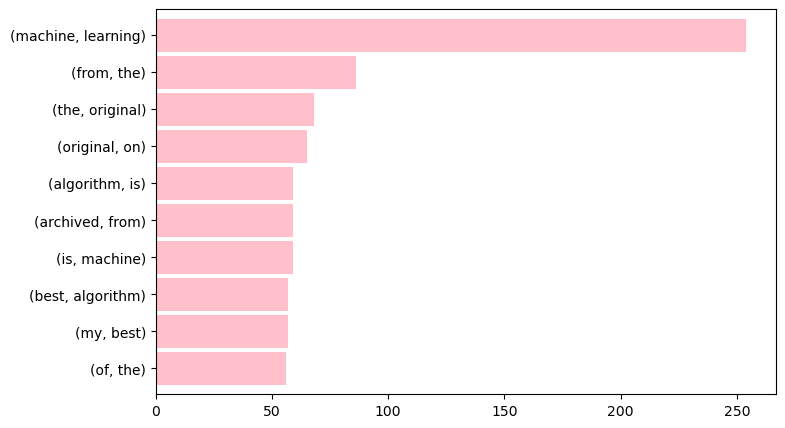

In [123]:
bigrams_series.sort_values().plot.barh(color='pink', width=.9, figsize=(8, 5))
plt.title('10 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')